In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)
sns.set(style="white", color_codes=True)

In [2]:
pd.set_option('display.max_rows' , 300)

In [3]:
#Load Data
train_house_df = pd.read_csv('train.csv/train.csv')
test_house_df = pd.read_csv('test.csv/test.csv')
macro_df = pd.read_csv('macro.csv/macro.csv')

In [4]:
macro_df.shape

(2484, 100)

In [5]:
train_house_df.shape

(30471, 292)

In [8]:
train_house_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [115]:
train_house_df['price_doc'].describe()

count    3.047100e+04
mean     7.006371e+06
std      3.961579e+06
min      1.000000e+06
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      2.453208e+07
Name: price_doc, dtype: float64

In [6]:
test_house_df.shape

(7662, 291)

In [7]:
test_house_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [4]:
train_house_df.columns.tolist()

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [21]:
ulimit = np.percentile(train_house_df.price_doc.values, 99)
llimit = np.percentile(train_house_df.price_doc.values, 1)
train_house_df['price_doc'].ix[train_house_df['price_doc']>ulimit] = ulimit
train_house_df['price_doc'].ix[train_house_df['price_doc']<llimit] = llimit

In [25]:
llimit

1000000.0

In [24]:
ulimit

24532075.39999992

In [26]:
train_house_df['price_doc'].describe()

count    3.047100e+04
mean     7.006371e+06
std      3.961579e+06
min      1.000000e+06
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      2.453208e+07
Name: price_doc, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


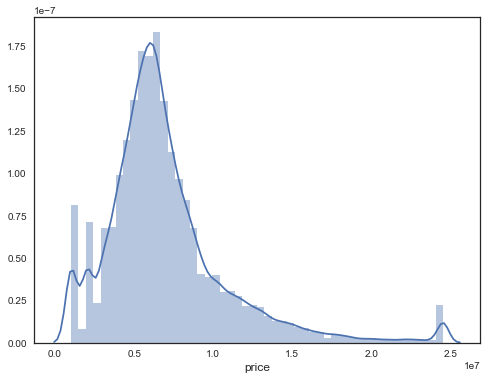

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(train_house_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


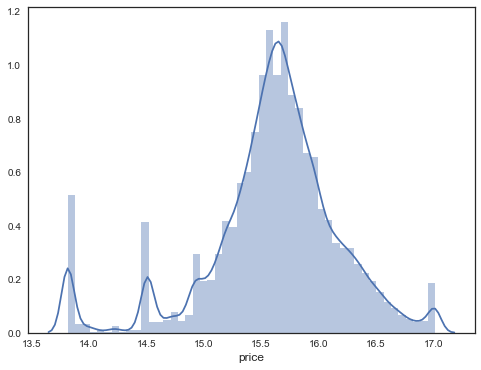

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(train_house_df.price_doc.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [5]:
label_df = train_house_df['price_doc']

In [6]:
feature_df = train_house_df.drop(['price_doc'], axis=1 )

In [6]:
feature_df.shape

(30471, 291)

In [225]:
feature_df.columns[feature_df.apply(lambda x: sum(x.isnull())) > 0]

Index(['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room',
       'kitch_sq', 'state', 'preschool_quota', 'school_quota',
       'hospital_beds_raion', 'raion_build_count_with_material_info',
       'build_count_block', 'build_count_wood', 'build_count_frame',
       'build_count_brick', 'build_count_monolith', 'build_count_panel',
       'build_count_foam', 'build_count_slag', 'build_count_mix',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995', 'metro_min_walk',
       'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'ID_railroad_station_walk',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg',
       'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',


In [227]:
feature_df.columns[feature_df.apply(lambda x: sum(x.isnull())/len(feature_df) )>0.4]

Index(['build_year', 'state', 'hospital_beds_raion',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500'],
      dtype='object')

In [14]:
feature_df["timestamp"].head(12)

0     2011-08-20
1     2011-08-23
2     2011-08-27
3     2011-09-01
4     2011-09-05
5     2011-09-06
6     2011-09-08
7     2011-09-09
8     2011-09-10
9     2011-09-13
10    2011-09-16
11    2011-09-16
Name: timestamp, dtype: object

In [11]:
pd.to_datetime(feature_df["timestamp"]).dt.year.value_counts()

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: timestamp, dtype: int64

In [16]:
merge_df = feature_df.append(test_house_df)

In [8]:
merge_df.shape

(38133, 291)

In [16]:
missing_value_columns = merge_df.columns[merge_df.apply(lambda x: sum(x.isnull()) ) > 0]

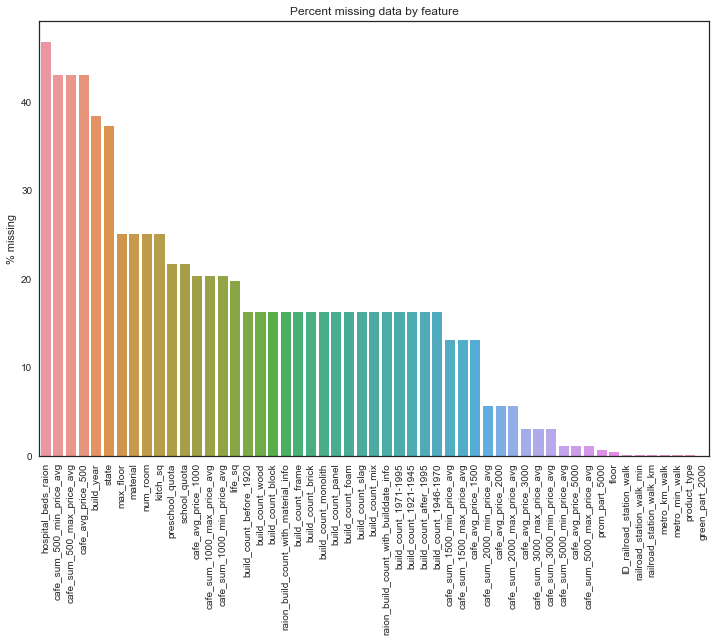

In [9]:
train_na = (merge_df.isnull().sum() / len(merge_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [29]:
imp_column=['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material','price_doc']

train_house_df[imp_column].describe()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,20899.000000,16912.000000,1.686600e+04,20899.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.909804,6.399301,2.107025,3.068057e+03,1.827121,7.006371e+06
std,38.031487,52.285733,5.319989,6.756550,0.851805,28.265979,0.880148,1.543878e+05,1.481154,3.961579e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000e+06
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.967000e+03,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,2.000000,6.000000,2.000000,1.979000e+03,1.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,9.000000,3.000000,2.005000e+03,2.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,19.000000,2014.000000,33.000000,2.005201e+07,6.000000,2.453208e+07


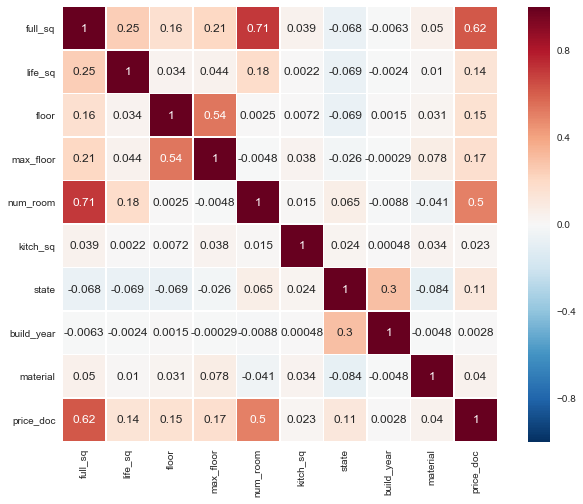

In [48]:
f, ax = plt.subplots(figsize=(11, 8))
plt.xticks(rotation='90')
sns.heatmap(train_house_df[imp_column].dropna().corr(), square=True, linewidths=.5, annot=True)

In [108]:
imp_column.remove('price_doc')

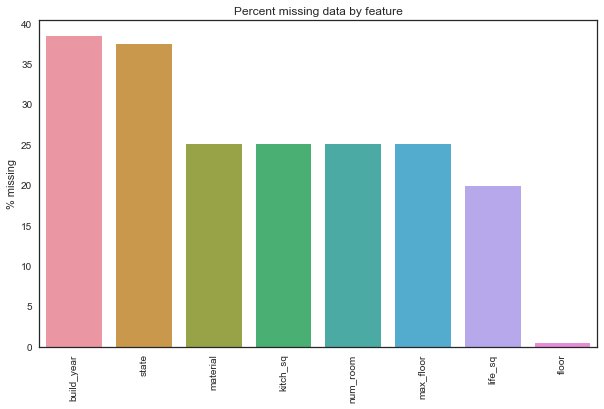

In [110]:
train_na = (merge_df[imp_column].isnull().sum() / len(merge_df[imp_column])) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [112]:
merge_df[imp_column].apply(lambda x: sum(x.isnull()))

full_sq           0
life_sq        7559
floor           167
max_floor      9572
num_room       9572
kitch_sq       9572
state         14253
build_year    14654
material       9572
dtype: int64

In [113]:
merge_df[imp_column].apply(lambda x: len(x.unique()))

full_sq       1404
life_sq        976
floor           43
max_floor       51
num_room        14
kitch_sq       282
state            6
build_year     128
material         7
dtype: int64

In [114]:
merge_df[imp_column].apply(lambda x: sum(x==0))

full_sq          3
life_sq         49
floor            9
max_floor      783
num_room        14
kitch_sq      1757
state            0
build_year     899
material         0
dtype: int64

In [ ]:
merge_df['life_sq_ratio']=merge_df['life_sq']/merge_df['full_sq']

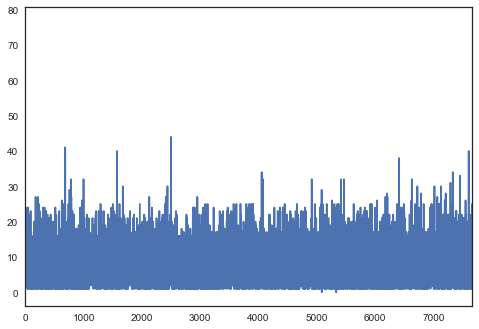

In [106]:
merge_df['floor'].plot()

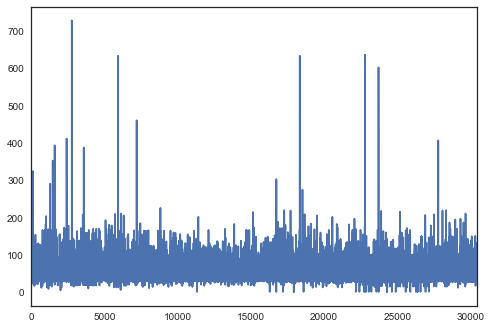

In [53]:
train_house_df['full_sq'][train_house_df['full_sq'] <=5000].plot()

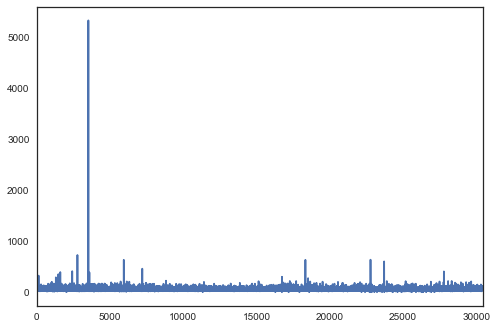

In [51]:
train_house_df['full_sq'].plot()

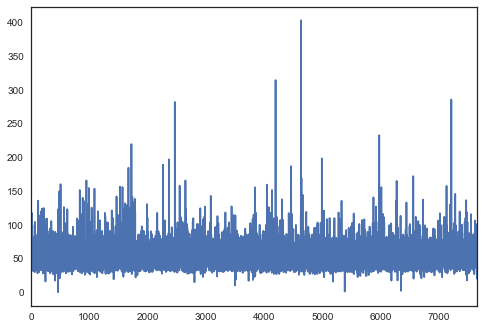

In [52]:
test_house_df['full_sq'].plot()

In [37]:
train_house_df[imp_column][train_house_df["full_sq"]>300]

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material,price_doc
128,325,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,5000000.0
1478,353,20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4750000.0
1610,394,17.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,1050000.0
2425,412,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6117000.0
2780,729,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,13250000.0
3527,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,6868818.0
3596,388,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3899400.0
5944,634,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10200000.0
7207,461,27.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5750000.0
16743,303,NaN,32.0,32.0,6.0,0.0,NaN,NaN,1.0,24532075.4


In [44]:
train_house_df[imp_column][train_house_df["full_sq"]<=300].dropna()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material,price_doc
8056,11,11.0,2.0,5.0,1.0,12.0,3.0,1907.0,2.0,2750000.0
8135,53,30.0,10.0,16.0,2.0,8.0,3.0,1980.0,1.0,9000000.0
8153,77,41.0,2.0,17.0,3.0,12.0,1.0,2014.0,6.0,7011550.0
8154,45,27.0,6.0,9.0,2.0,6.0,3.0,1970.0,1.0,7100000.0
8255,74,46.0,12.0,24.0,3.0,9.0,3.0,2004.0,1.0,12100000.0
8268,93,93.0,3.0,1.0,3.0,1.0,1.0,2013.0,1.0,5427640.0
8282,51,30.0,7.0,17.0,2.0,9.0,3.0,2003.0,1.0,7700000.0
8287,77,50.0,3.0,5.0,3.0,8.0,2.0,1957.0,2.0,11700000.0
8293,38,19.0,17.0,17.0,1.0,8.0,3.0,1986.0,1.0,1600000.0
8350,43,29.0,3.0,5.0,2.0,5.0,3.0,1960.0,2.0,6400000.0


In [46]:
train_house_df[imp_column][train_house_df["full_sq"]==train_house_df["life_sq"]].dropna()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material,price_doc
8056,11,11.0,2.0,5.0,1.0,12.0,3.0,1907.0,2.0,2750000.0
8268,93,93.0,3.0,1.0,3.0,1.0,1.0,2013.0,1.0,5427640.0
8718,43,43.0,2.0,5.0,2.0,5.0,2.0,1965.0,2.0,6700000.0
8796,142,142.0,4.0,6.0,2.0,10.0,1.0,2013.0,2.0,5680000.0
8856,71,71.0,1.0,22.0,2.0,1.0,1.0,2013.0,6.0,5930866.0
8949,123,123.0,3.0,10.0,3.0,123.0,3.0,2013.0,2.0,8287230.0
9180,57,57.0,5.0,9.0,3.0,5.0,3.0,1970.0,1.0,1000000.0
9463,35,35.0,7.0,12.0,1.0,9.0,3.0,1967.0,1.0,1000000.0
9724,80,80.0,7.0,1.0,2.0,1.0,1.0,2013.0,1.0,13718760.0
9731,32,32.0,6.0,9.0,1.0,6.0,3.0,1978.0,1.0,6050000.0


In [41]:
train_house_df[imp_column][train_house_df["full_sq"]==0]

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material,price_doc
17932,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4425000.0
24296,0,77.0,4.0,17.0,3.0,0.0,1.0,0.0,1.0,8167508.0


In [43]:
test_house_df[['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' ]][test_house_df["full_sq"]==0]

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq
464,0.0,37.8,7,19,1,0.0


In [17]:
pd.to_datetime(merge_df["timestamp"]).dt.year.value_counts()

2014    13662
2013     7978
2015     6918
2012     4839
2016     3983
2011      753
Name: timestamp, dtype: int64

In [29]:
train_house_df['yearmonth']=(pd.to_datetime(train_house_df["timestamp"]).dt.year*12)+(pd.to_datetime(train_house_df["timestamp"]).dt.month*30)+pd.to_datetime(train_house_df["timestamp"]).dt.day

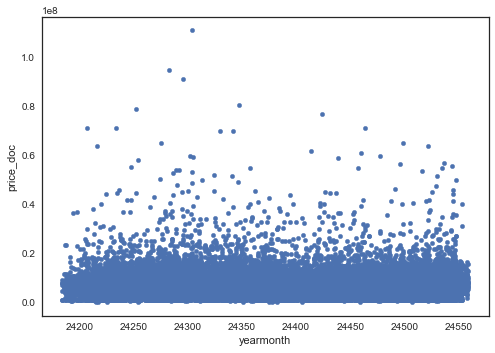

In [30]:
train_house_df[['yearmonth' , 'price_doc']].plot.scatter(x='yearmonth' , y='price_doc')

In [32]:
pd.to_datetime(macro_df["timestamp"]).dt.year.value_counts()

2012    366
2015    365
2013    365
2011    365
2014    365
2010    365
2016    293
Name: timestamp, dtype: int64

In [34]:
macro_df.columns.tolist()

['timestamp',
 'oil_urals',
 'gdp_quart',
 'gdp_quart_growth',
 'cpi',
 'ppi',
 'gdp_deflator',
 'balance_trade',
 'balance_trade_growth',
 'usdrub',
 'eurrub',
 'brent',
 'net_capital_export',
 'gdp_annual',
 'gdp_annual_growth',
 'average_provision_of_build_contract',
 'average_provision_of_build_contract_moscow',
 'rts',
 'micex',
 'micex_rgbi_tr',
 'micex_cbi_tr',
 'deposits_value',
 'deposits_growth',
 'deposits_rate',
 'mortgage_value',
 'mortgage_growth',
 'mortgage_rate',
 'grp',
 'grp_growth',
 'income_per_cap',
 'real_dispos_income_per_cap_growth',
 'salary',
 'salary_growth',
 'fixed_basket',
 'retail_trade_turnover',
 'retail_trade_turnover_per_cap',
 'retail_trade_turnover_growth',
 'labor_force',
 'unemployment',
 'employment',
 'invest_fixed_capital_per_cap',
 'invest_fixed_assets',
 'profitable_enterpr_share',
 'unprofitable_enterpr_share',
 'share_own_revenues',
 'overdue_wages_per_cap',
 'fin_res_per_cap',
 'marriages_per_1000_cap',
 'divorce_rate',
 'construction_val

In [31]:
train_house_df[['yearmonth' , 'price_doc']].corr()

,yearmonth,price_doc
yearmonth,1.000000,-0.013977
price_doc,-0.013977,1.000000


In [33]:
print(len(train_house_df[train_house_df["full_sq"]== 0]))

2


In [40]:
print(len(test_house_df[test_house_df["full_sq"]== 0]))

1


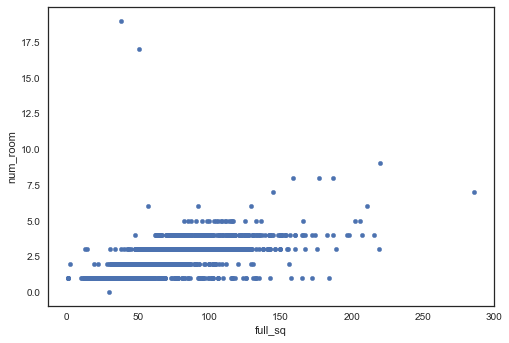

In [87]:
merge_df[merge_df['full_sq']<=400].dropna().plot.scatter(x='full_sq', y='num_room')

In [103]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

alg = LinearRegression(normalize=True ,  fit_intercept=True)

#alg = Ridge(alpha=0.1, normalize=True ,  fit_intercept=True, max_iter=100)

#alg = Lasso(alpha=0.001 , normalize=True ,  fit_intercept=True )

alg = DecisionTreeRegressor()

#temp_df =  temp_df.drop(temp_df.index[temp_df['full_sq']>400])
temp_df  = train_house_df[['num_room' ,'full_sq' ]].dropna()
alg.fit(temp_df['num_room'].values.reshape(-1,1), temp_df['full_sq'].values.reshape(-1,1))
predicted = alg.predict(temp_df['num_room'].values.reshape(-1,1))
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(predicted,temp_df['full_sq'].values)))
predicted_value = alg.predict(temp_df[temp_df['full_sq']==0]['num_room'].values.reshape(-1,1))
predicted_value

RMSE : 15.31


array([ 80.07142857,  75.41604278])

In [100]:
alg.coef_

array([[ 18.04764803]])

In [74]:
temp_df[temp_df['full_sq']==0]

,num_room,full_sq
17932,0.0,0
24296,3.0,0


In [60]:
temp_df.apply(lambda x: sum(x.isnull())) 

num_room    0
full_sq     0
dtype: int64

In [65]:
temp_df['num_room'].describe()

count    20899.000000
mean         1.909804
std          0.851805
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

In [66]:
temp_df['full_sq'].describe()

count    20899.000000
mean        54.392650
std         22.105406
min          0.000000
25%         39.000000
50%         51.000000
75%         64.000000
max        637.000000
Name: full_sq, dtype: float64

In [61]:
temp_df.corr()

,num_room,full_sq
num_room,1.000000,0.695444
full_sq,0.695444,1.000000


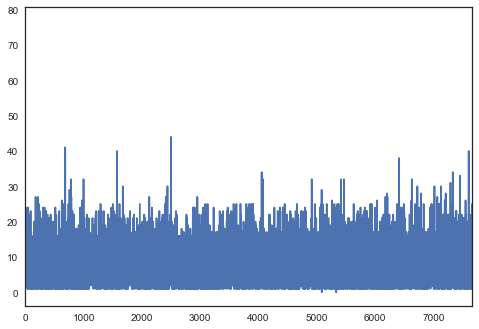

In [11]:
merge_df['floor'].plot()

In [84]:
train_house_df= train_house_df[train_house_df["life_sq"]<=200]

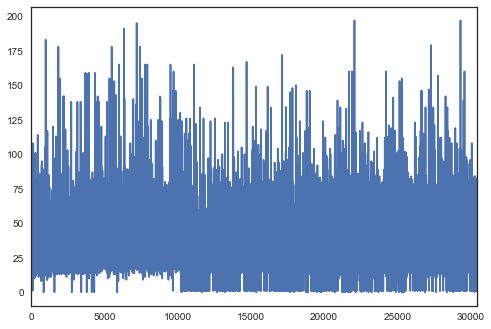

In [85]:
train_house_df['life_sq'].plot()

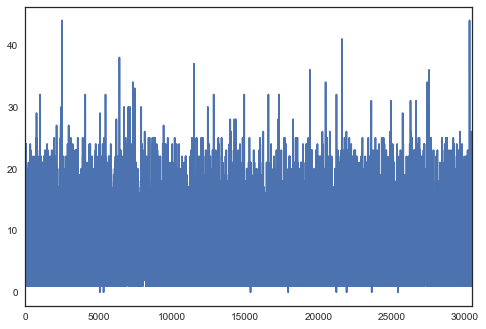

In [88]:
train_house_df['floor'].plot()

In [87]:
train_house_df= train_house_df[train_house_df["floor"]<=50]

In [89]:
train_house_df['full_sq'].describe()

count    23908.000000
mean        52.476242
std         20.311468
min          0.000000
25%         38.000000
50%         46.000000
75%         62.000000
max        199.000000
Name: full_sq, dtype: float64

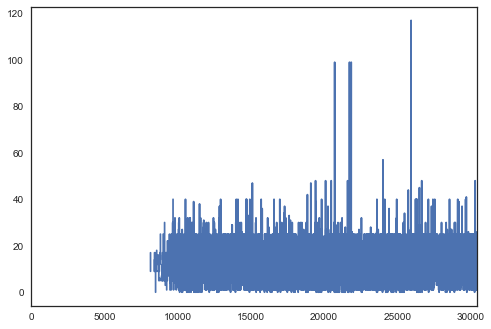

In [90]:
train_house_df['max_floor'].plot()

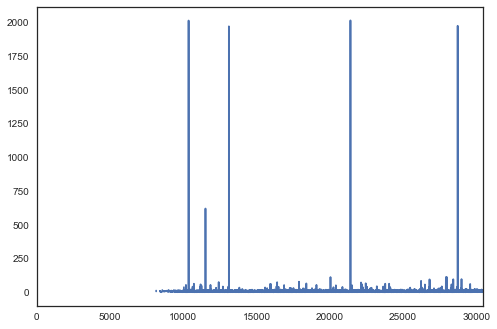

In [92]:
train_house_df['kitch_sq'].plot()

In [94]:
len(train_house_df[train_house_df['kitch_sq']> 100])

9

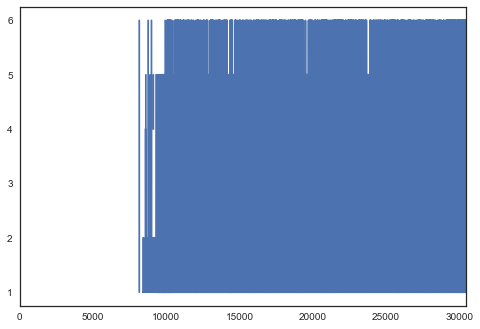

In [95]:
train_house_df['material'].plot() 

In [15]:
imp_column =imp_column.append('id')

In [76]:
len(train_house_df[train_house_df['full_sq']>200])

14

In [78]:
len(test_house_df[test_house_df['full_sq']>200])

6

In [45]:
train_house_df.shape

(30471, 292)

In [51]:
merge_df= merge_df[merge_df["full_sq"]!=5326]

In [52]:
merge_df.shape

(38132, 291)

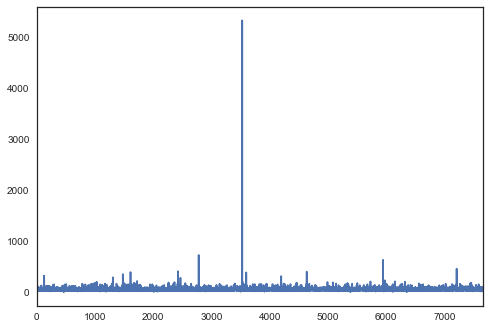

In [11]:
merge_df["full_sq"].plot()

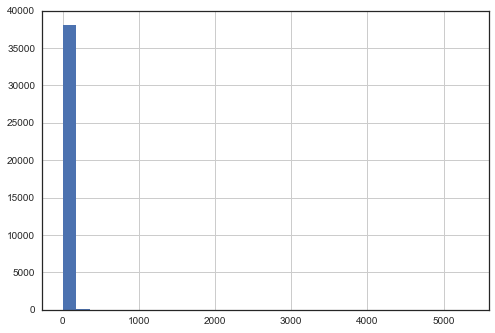

In [12]:
merge_df["full_sq"].hist(bins=30)

In [66]:
merge_df= merge_df[merge_df["full_sq"]<=200]

In [57]:
merge_df[merge_df["full_sq"] <0]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [67]:
merge_df.shape

(38091, 291)

In [47]:
merge_df.drop(merge_df["full_sq"]==5326 , axis=0 , inplace=True)

In [49]:
merge_df[merge_df["id"]==3530]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [40]:
merge_df.shape

(38129, 291)

In [20]:
train_house_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

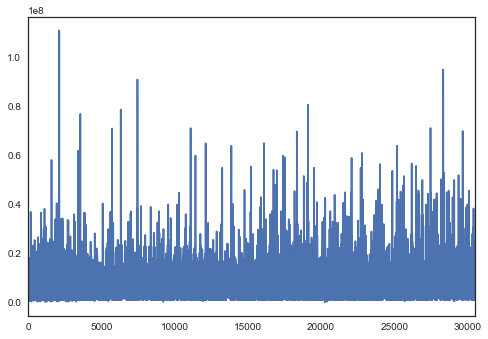

In [21]:
train_house_df['price_doc'].plot()

In [28]:
train_house_df[train_house_df['price_doc']==train_house_df['price_doc'].max()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [10]:
merge_df['build_year'][merge_df['build_year'] <= 1600]=2014

merge_df['build_year'][merge_df['build_year'] > 2050]=2014

merge_df['house_age'] = 2019  - merge_df['build_year']

#merge_df['house_age'].describe()

#merge_df.drop('build_year' , axis=1 , inplace=True)

imp_column.append('house_age')

imp_column

NameError: name 'imp_column' is not defined

In [241]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=1)

merge_df[imp_column] = imp.fit_transform(merge_df[imp_column])


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


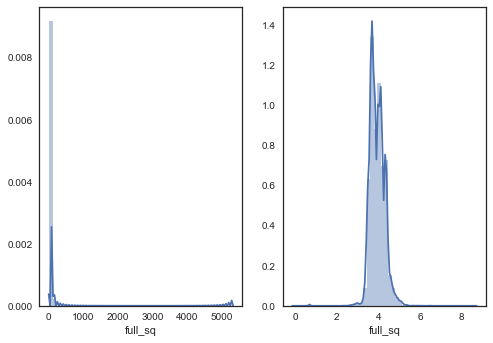

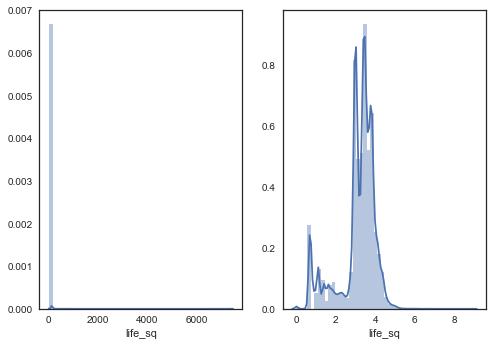

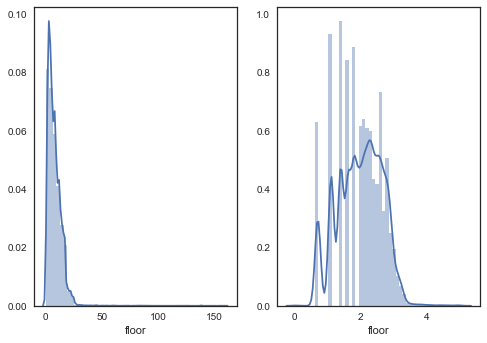

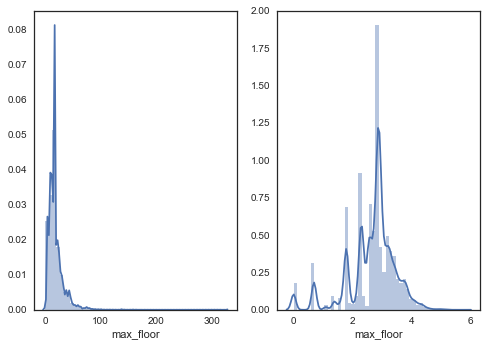

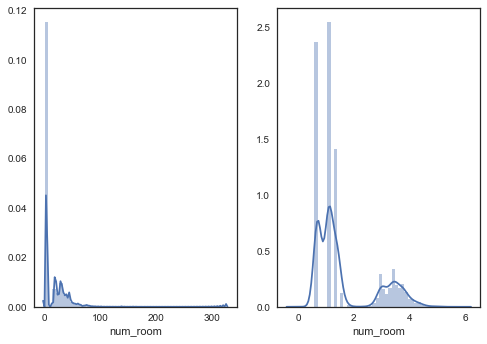

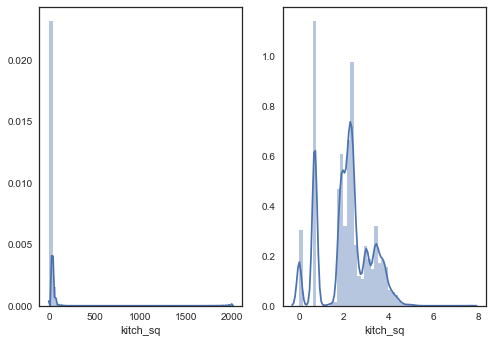

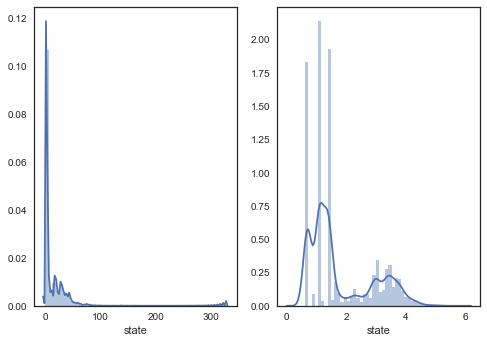

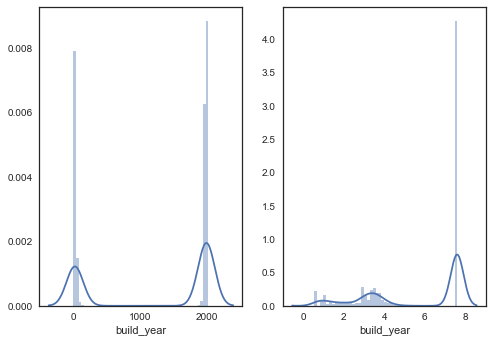

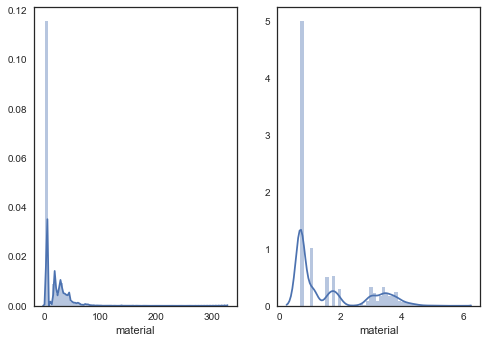

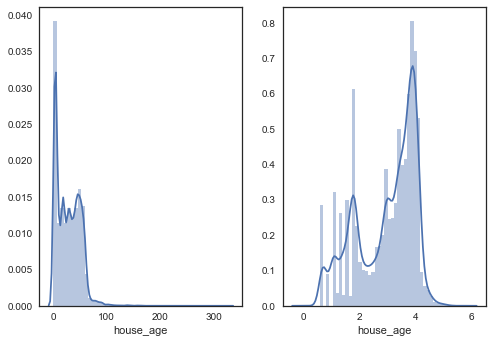

In [243]:
for col in imp_column:
    f,axarray = plt.subplots(1,2)
    plt.figure(figsize=(4,4))
    sns.distplot(merge_df[col], bins=50, kde=True,ax =axarray[0])
    #plt.xlabel('house_age', fontsize=12)
    sns.distplot(np.log1p(merge_df[col]), bins=50, kde=True,ax =axarray[1])
#plt.show()

In [244]:
merge_df['log_full_sq'] =  np.log1p(merge_df['full_sq'])
merge_df['log_life_sq'] =  np.log1p(merge_df['life_sq'])

merge_df['product_type'][merge_df['product_type'].isnull()]='Investment'

In [ ]:
train_house_df

In [735]:
main_merge_df  =  merge_df[['log_full_sq' , 'log_life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'house_age', 'material','product_type' , 'sub_area']]

In [253]:
from sklearn.preprocessing import LabelEncoder

def createDummy(df , var_mod):
    le = LabelEncoder()
    #var_mod = ['PROD_ABBR','STATE_ABBR' ]
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

    #One Hot Coding:
    df = pd.get_dummies(df, columns=var_mod)
    return df

In [255]:
main_merge_df.columns[0:10]

Index(['log_full_sq', 'log_life_sq', 'floor', 'max_floor', 'num_room',
       'kitch_sq', 'state', 'house_age', 'material', 'product_type_0'],
      dtype='object')

In [737]:
main_merge_df.columns

Index(['log_full_sq', 'log_life_sq', 'floor', 'max_floor', 'num_room',
       'kitch_sq', 'state', 'house_age', 'material', 'product_type',
       'sub_area'],
      dtype='object')

In [259]:
#imp_column.append('product_type')

In [260]:
#imp_column.append('sub_area')

In [353]:
#main_merge_df.drop(['num_room' , 'state' , 'log_life_sq' , 'max_floor'],axis=1 , inplace=True)

In [261]:
#imp_column

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'num_room',
 'kitch_sq',
 'state',
 'build_year',
 'material',
 'house_age',
 'product_type',
 'sub_area']

In [12]:
other_column =  merge_df.columns.drop(imp_column)

In [13]:
len(other_column)

283

In [264]:
#other_column[0:14]

In [265]:
#merge_df[other_column[0:14]].describe()

In [266]:
#print (merge_df[other_column[0:14]].shape)
#df_without_multicollinearity=calculate_vif_(merge_df[other_column[0:14]])
#print(df_without_multicollinearity.corr())

In [267]:
#final_imp_column.append('16_29_female')

#final_imp_column

In [268]:
#final_imp_column.append('7_14_female')
#final_imp_column

In [14]:
cat_columns  = merge_df[other_column].select_dtypes(exclude=['float64' , 'int64']).columns

In [15]:
cat_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [16]:
num_columns  = merge_df[other_column].select_dtypes(include=['float64' , 'int64']).columns

In [25]:
merge_df.shape

(38133, 292)

In [66]:
train_house_df[temp_col].describe()

,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km
count,30471.000000,30471.000000,30446.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30446.000000,30446.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,4.961273,3.701464,42.737601,3.561467,0.981684,1.323956,3.099942,0.300511,0.768831,11.167613,2.314765,10.884613,4.386945,52.643335,38.857321,4.587283,6.086609,45.707853,0.414136,4.969626,0.690947,6.274764,11.318152,14.056721,15.023338,16.044808,1.881276,11.515014,3.396649,22.414066,1.889380,17.214848,51.670966,9.992447,6.695514,17.401611,10.945350,4.410781,3.492231,7.340116,4.931418,13.283916,3.958882,1.154586,4.232376,6.123672,9.436658,4.787636,2.646493,14.551103,3.356771,6.855891,3.926702,1.505808,2.010973,1.328488,1.345235,2.330047,0.972014,7.739237,9.638074,7.063236,5.552256,0.687988
std,6.553515,5.808432,69.303131,5.775261,2.121956,3.058145,3.965363,0.298402,0.717953,7.036351,1.451071,6.789709,3.836359,46.036303,27.766264,3.913735,4.794630,34.393019,1.272488,15.269861,0.434919,5.142492,8.066780,8.343162,8.475342,8.441964,1.297188,11.348724,1.871334,17.389323,1.972818,10.300605,35.336898,7.332000,3.790844,10.399510,7.249756,5.595367,4.552470,5.619330,4.804238,8.497170,3.447536,1.541425,4.626039,4.667856,7.642037,5.395468,2.952410,11.079856,4.341804,6.731484,4.907562,2.253759,2.306446,1.526219,3.053600,2.986937,0.748876,5.780424,7.112284,5.702807,5.304206,0.832922
min,0.000000,0.000000,0.000000,0.000000,0.000470,0.000000,0.003737,0.000000,0.000000,0.274139,0.000000,0.198071,0.028153,0.337833,1.000000,0.028153,0.035191,1.000000,0.002804,0.033646,0.006707,0.013626,0.001935,0.000355,0.001947,0.072897,0.000364,1.000000,0.001935,1.000000,0.002299,0.136715,5.000000,0.062026,1.000000,0.510710,0.309811,0.004663,0.030266,0.400563,0.000000,0.661366,0.003847,0.000000,0.000000,0.000000,0.114746,0.005458,0.002517,0.041227,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.000000,0.004072,0.000000,0.005545,0.026788,0.007903,0.008949,0.000357
25%,1.721280,1.036568,11.484150,0.957013,0.199946,0.269716,0.973297,0.100951,0.288289,5.304559,1.334801,6.221938,1.931375,23.176502,18.000000,2.116856,3.235497,19.000000,0.101312,1.215747,0.339637,2.633404,5.339845,8.346336,9.256658,10.460471,0.779029,2.000000,2.103387,4.000000,0.655010,9.992420,32.000000,5.213745,3.000000,8.720666,5.237792,1.231846,0.976235,3.770

In [61]:
merge_df[temp_col].columns[merge_df[temp_col].apply(lambda x: sum(x.isnull()) ) > 0]

Index(['raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995'],
      dtype='object')

In [62]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

merge_df[temp_col] = imp.fit_transform(merge_df[temp_col])

ValueError: Some rows only contain missing values: [ 2042  2252  2263 ..., 38116 38121 38129]

In [71]:
temp_vif_pdf =  train_house_df[temp_col].dropna()
temp_vif_pdf.drop(['ID_metro' , 'ID_railroad_station_walk' , 'ID_railroad_station_avto' , 'ID_big_road1',
                  'ID_big_road2' , 'ID_bus_terminal' , 'ID_railroad_terminal'] , axis=1  , inplace=True)

In [72]:
df_without_multicollinearity=calculate_vif_(temp_vif_pdf)
print(df_without_multicollinearity.corr())

(30446, 58)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
vif=[116.23309791188237, 205.99410647188051, 169947155749830.03, 529835250278881.88, 19.39657221791445, 1173.1875227802211, 42.522025229108813, 3.080859698118263, 5.7118881080871891, 47.283250367008428, 9.7738860478502669, 88.193500771609436, 9079837958408.2578, 95821268667457.359, 91.137196569601798, 94.685604159181366, 12740027234428.561, 13688752666779.623, 5.0759299302218803, 34.45776395235783, 846.95255208063509, 10193.466666084001, 37725.928851065815, 20344.586816139315, 9.0652289516907913, 22.536927403768537, 23.011569107754031, 228.64248836461528, 40.604394274729621, 229.94266614283222, 175.01354148290864, 92.455494235254108, 54.324242093738924, 68.503550741929004, 45.642398624938451, 35.709673845171025, 13.687359733419164, 11.086159199468673, 30.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif=[116.03366713501453, 205.09806957479367, 175.44751369918771, 19.259099922791535, 1171.5803228445147, 42.500821702204341, 3.0621621095634213, 5.703191564203415, 47.187832478480715, 9.7634974199302924, 88.18368874928241, 375299968947541.31, 176611750092960.63, 90.764137851304042, 93.629913152359848, 7678771743172.2012, inf, 5.070656155754671, 34.450400621465072, 846.9411013132684, 10190.608234938865, 37687.729683056787, 20311.390149527753, 9.0651061628638505, 22.53523808174069, 22.988828930220684, 228.41628795502007, 40.587513224825557, 229.6734268376166, 175.01353811718386, 92.330353045467874, 54.312666412996499, 68.462494444684722, 45.636962957937328, 35.709545406043539, 13.677039403550932, 11.039038476212935, 30.2472050816713, 21.598864995704865, 57.36879863785186, 90.489305500192927, 19.500662290320182, 65.649546557504266, 30.327194623823733, 57.463949878001898, 58.980684990174616, 25.503115167200317, 18.922971205620787, 9.755119782080218, 1122.9131567103259, 36.824755552700182, 

In [73]:
temp_col = num_columns[128:266].tolist()
#temp_col.append('price_doc')
temp_col

['green_part_500',
 'prom_part_500',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_count_500_na_price',
 'cafe_count_500_price_500',
 'cafe_count_500_price_1000',
 'cafe_count_500_price_1500',
 'cafe_count_500_price_2500',
 'cafe_count_500_price_4000',
 'cafe_count_500_price_high',
 'big_church_count_500',
 'church_count_500',
 'mosque_count_500',
 'leisure_count_500',
 'sport_count_500',
 'market_count_500',
 'green_part_1000',
 'prom_part_1000',
 'office_count_1000',
 'office_sqm_1000',
 'trc_count_1000',
 'trc_sqm_1000',
 'cafe_count_1000',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_count_1000_na_price',
 'cafe_count_1000_price_500',
 'cafe_count_1000_price_1000',
 'cafe_count_1000_price_1500',
 'cafe_count_1000_price_2500',
 'cafe_count_1000_price_4000',
 'cafe_count_1000_price_high',
 'big_chu

In [87]:
from sklearn.preprocessing import Imputer

temp_vif_pdf =  train_house_df[temp_col]

In [88]:
temp_vif_pdf.columns

Index(['green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
       'trc_count_500', 'trc_sqm_500', 'cafe_count_500',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=138)

In [90]:
imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

temp_vif_pdf[temp_col] = imp.fit_transform(temp_vif_pdf[temp_col])

In [91]:
temp_vif_pdf.columns

Index(['green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
       'trc_count_500', 'trc_sqm_500', 'cafe_count_500',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=138)

In [78]:
temp_vif_pdf.shape

(30471, 138)

In [92]:
df_without_multicollinearity=calculate_vif_(temp_vif_pdf)
print(df_without_multicollinearity.corr())

(30471, 138)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif=[8.0569476219798535, 4.3723541026916157, 15.4503028657632, 4.2197687634970604, 5.5325155334775857, 5.6657403302161189, inf, 34247905911562.707, 34378623109698.441, 136472715980924.13, inf, inf, inf, inf, inf, inf, inf, 18.118763259525004, 28.525546058931855, 1.4150166252680345, 2.0287286310088173, 4.4405218470913415, 2.1391728777674164, 51.170816178274293, 28.769942050681056, 75.263173869069689, 14.127487514266331, 20.971841134402524, 9.1780838727317775, inf, 1126744965566.7991, 1180497936401.1785, 4600203909469.3525, inf, inf, inf, inf, inf, inf, inf, 34.929516774704517, 75.010068438430665, 2.6579650845526062, 19.729427647814948, 11.527108198172478, 4.2888001715580497, 157.21294301979884, 85.475978343880385, 275.65567171432428, 28.867523959287386, 36.627061684181349, 11.736355055812426, inf, 105384336664.80627, 142733527529.37155, 486691481857.72906, inf, inf, inf, inf, inf, inf, inf, 155.21840569441986, 179.96857759270884, 3.5322855376760081, 41.153894932613625, 29.71029810353127

In [93]:
num_feature_columns = ['green_part_500',
'prom_part_500',
'office_sqm_500',
'trc_count_500',
'trc_sqm_500',
'cafe_sum_500_min_price_avg',
'cafe_count_500_price_1000',
'cafe_count_500_price_4000',
'cafe_count_500_price_high',
'mosque_count_500',
'leisure_count_500',
'sport_count_500',
'market_count_500',
'prom_part_1000',
'office_sqm_1000',
'cafe_sum_1000_min_price_avg',
'cafe_count_1000_price_high',
'mosque_count_1000',
'market_count_1000',
'trc_sqm_1500',
'cafe_sum_1500_min_price_avg',
'mosque_count_1500',
'cafe_sum_2000_min_price_avg',
'mosque_count_2000',
'market_count_2000',
'green_part_3000',
'trc_sqm_3000',
'mosque_count_3000',
'prom_part_5000',
'mosque_count_5000',
'female_f',
'young_female',
'7_14_female',
'16_29_female',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'kindergarten_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'water_km',
 'mkad_km',
 'big_road1_km',
 'railroad_km',
 'fitness_km',
 'office_km',
 'additional_education_km',
 'church_synagogue_km',
 'mosque_km',
 'catering_km'
]

In [94]:
temp_vif_pdf =  train_house_df[num_feature_columns]

imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

temp_vif_pdf[num_feature_columns] = imp.fit_transform(temp_vif_pdf[num_feature_columns])

df_without_multicollinearity=calculate_vif_(temp_vif_pdf)
print(df_without_multicollinearity.corr())

(30471, 63)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
vif=[3.1121960604507954, 3.3826359576935818, 2.4809477137474736, 3.8723447376247497, 4.2075435273947566, 1.8798054634892705, 4.6640753533496522, 4.4470642490956358, 3.588991894418383, 1.3582693536736199, 1.3375549287464787, 3.381242154884081, 1.9628126952654874, 5.4047086381756149, 4.8536043123918819, 2.0123069893577892, 2.6976167362937269, 2.4686109343393032, 3.222180903901839, 4.1982410467284605, 4.7707410259009349, 3.2997967908887533, 5.0497960470143664, 4.219355995179658, 4.0646574251116192, 10.488259050896351, 7.1635681457213112, 4.4969217292094985, 6.1056552513054978, 5.0128867572157043, 1014.3685882606851, 677.37402693283479, 657.2915157119927, 1021.5760642260873, 72645.111196897618, 80342.021555198822, 93808.36281765977, 77664.

In [97]:
from sklearn.preprocessing import LabelEncoder

def createDummy(df , var_mod):
    le = LabelEncoder()
    #var_mod = ['PROD_ABBR','STATE_ABBR' ]
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

    #One Hot Coding:
    df = pd.get_dummies(df, columns=var_mod)
    return df

In [102]:
train_house_df.shape

(30471, 292)

In [126]:
train_house_df = pd.read_csv('train.csv/train.csv')

cat_columns  = train_house_df.select_dtypes(exclude=['float64' , 'int64']).columns.tolist()
cat_columns.remove('timestamp')

temp_vif_pdf =  train_house_df[cat_columns]

In [127]:
temp_vif_pdf.shape

(30471, 15)

In [129]:
temp_vif_pdf.apply(lambda x: len(x.unique()))

product_type                   2
sub_area                     146
culture_objects_top_25         2
thermal_power_plant_raion      2
incineration_raion             2
oil_chemistry_raion            2
radiation_raion                2
railroad_terminal_raion        2
big_market_raion               2
nuclear_reactor_raion          2
detention_facility_raion       2
water_1line                    2
big_road1_1line                2
railroad_1line                 2
ecology                        5
dtype: int64

In [131]:
temp_vif_pdf_dummy = createDummy(temp_vif_pdf,cat_columns)

#imp  =  Imputer(missing_values='NaN' ,strategy='most_frequent' , axis=1)

#temp_vif_pdf_dummy[cat_columns] = imp.fit_transform(temp_vif_pdf_dummy[cat_columns])

df_without_multicollinearity=calculate_vif_(temp_vif_pdf_dummy)
print(df_without_multicollinearity.corr())

(30471, 177)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [48]:
macro_num_columns  = macro_df.select_dtypes(include=['float64' , 'int64']).columns

In [49]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

macro_df[macro_num_columns] = imp.fit_transform(macro_df[macro_num_columns])

In [52]:
df_without_multicollinearity=calculate_vif_(macro_df[macro_num_columns])
print(df_without_multicollinearity.corr())

(2484, 96)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [118]:
len(temp_vif_pdf_dummy.columns)

1338

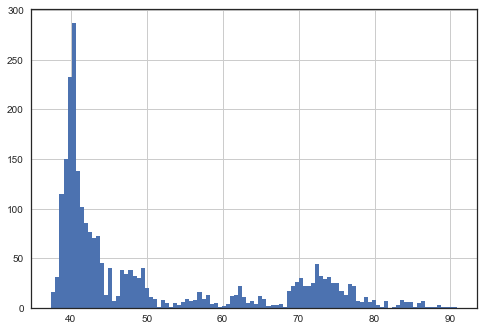

In [40]:
macro_df['eurrub'].hist(bins=100)

In [42]:
macro_num_columns_required=['oil_urals', 'balance_trade', 'balance_trade_growth', 'eurrub',
       'net_capital_export', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_rate',
       'mortgage_value', 'rent_price_3room_bus', 'power_clinics',
       'seats_theather_rfmin_per_100000_cap']

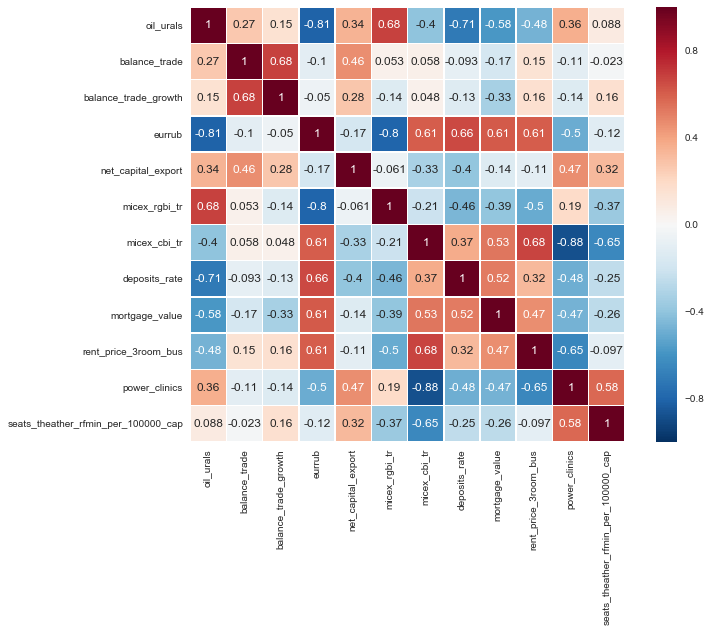

In [44]:
f, ax = plt.subplots(figsize=(11, 8))
plt.xticks(rotation='90')
sns.heatmap(macro_df[macro_num_columns_required].dropna().corr(), square=True, linewidths=.5, annot=True)

In [46]:
df_without_multicollinearity=calculate_vif_(macro_df[macro_num_columns_required])
print(df_without_multicollinearity.corr())

(2484, 12)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


ValueError: On entry to DLASCL parameter number 5 had an illegal value

In [ ]:
macro_df[macro_num_columns_required]

In [101]:
len(cat_column)

16

In [ ]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

merge_df[imp_column] = imp.fit_transform(merge_df[imp_column])

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X):
    print (X.shape)
    thresh = 5.0
    variables = list(range(X.shape[1]))
    dropped=True
    while (dropped==True):
        dropped=False
        print(variables)
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in list(range(X[variables].shape[1]))]
        print('vif='+str(vif))
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]
#df_without_multicollinearity=calculate_vif_(temp_vif_pdf)
#print(df_without_multicollinearity.corr())

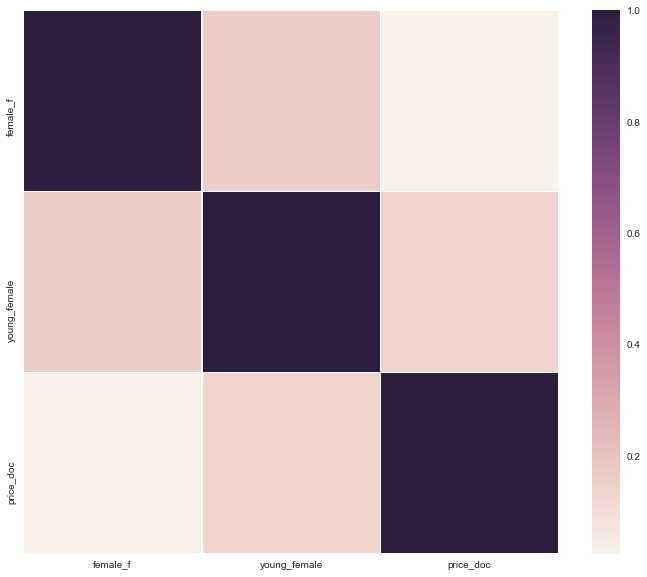

In [48]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_house_df[['female_f' , 'young_female' , 'price_doc']].corr(),linewidths=.5, ax=ax);

In [360]:
macro_cat_columns  = macro_df.select_dtypes(exclude=['float64' , 'int64']).columns

macro_num_columns  = macro_df.select_dtypes(include=['float64' , 'int64']).columns

In [361]:
merge_df[cat_columns].apply(lambda x: len(x.unique()))

timestamp                    1435
product_type                    2
sub_area                      146
culture_objects_top_25          2
thermal_power_plant_raion       2
incineration_raion              2
oil_chemistry_raion             2
radiation_raion                 2
railroad_terminal_raion         2
big_market_raion                2
nuclear_reactor_raion           2
detention_facility_raion        2
water_1line                     2
big_road1_1line                 2
railroad_1line                  2
ecology                         5
source                          2
dtype: int64

In [362]:
macro_df[macro_cat_columns].apply(lambda x: len(x.unique()))

timestamp                    2484
child_on_acc_pre_school         5
modern_education_share          4
old_education_build_share       4
dtype: int64

In [ ]:
macro_df.apply(lambda x: len(x.unique()))

In [363]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='most_frequent' , axis=1)

macro_df[macro_num_columns] = imp.fit_transform(macro_df[macro_num_columns])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X):
    print (X.shape)
    thresh = 5.0
    variables = list(range(X.shape[1]))
    dropped=True
    while (dropped==True):
        dropped=False
        print(variables)
        for var in X.columns:
            vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) 
            if np.isinf(vif):
                break
        print('vif='+str(vif))
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]

In [ ]:
macro_df.apply(lambda x: len(x.unique()))

In [337]:
macro_df.columns[macro_df.apply(lambda x: sum(x.isnull()) ) > 0]

Index([], dtype='object')

In [738]:
imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=1)

merge_df[num_columns] = imp.fit_transform(merge_df[num_columns])

In [339]:
merge_df.columns[merge_df.apply(lambda x: sum(x.isnull())) >0]

Index([], dtype='object')

In [365]:
merge_df[cat_columns].describe()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,source
count,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133,38133
unique,1435,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5,2
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor,train
freq,160,24479,2073,35514,36065,35551,37772,24464,36679,34779,37021,34303,35238,37029,37001,10078,30471


In [366]:
macro_df[macro_cat_columns].describe()

,timestamp,child_on_acc_pre_school,modern_education_share,old_education_build_share
count,2484,2484,2484,2484
unique,2484,5,4,4
top,2013-03-21,"18,200","93,17","18,95"
freq,1,1023,1389,1389


In [283]:
macro_df['child_on_acc_pre_school'].value_counts()

7,311     366
#!        365
16,765    365
3,013     365
45,713    365
Name: child_on_acc_pre_school, dtype: int64

In [284]:
macro_df['child_on_acc_pre_school'][macro_df['child_on_acc_pre_school']=='#!']='18,200'

macro_df['child_on_acc_pre_school'][macro_df['child_on_acc_pre_school'].isnull()]='18,200'

In [285]:
macro_df['modern_education_share'].value_counts()

90,92      365
93,08      365
95,4918    365
Name: modern_education_share, dtype: int64

In [286]:
macro_df['modern_education_share'][macro_df['modern_education_share'].isnull()]='93,17'

In [287]:
macro_df['old_education_build_share'].value_counts()

8,2517    365
23,14     365
25,47     365
Name: old_education_build_share, dtype: int64

In [288]:
macro_df['old_education_build_share'][macro_df['old_education_build_share'].isnull()]='18,95'

In [367]:
macro_df.columns[macro_df.apply(lambda x: sum(x.isnull()))>0]

Index([], dtype='object')

In [368]:
merge_df.columns[merge_df.apply(lambda x: sum(x.isnull()))>0]

Index([], dtype='object')

In [369]:
merge_df.shape

(38133, 295)

In [739]:
main_merge_df.shape

(38133, 11)

In [371]:
cat_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology',
       'source'],
      dtype='object')

In [740]:
main_merge_df[cat_columns] = merge_df[cat_columns]

In [741]:
main_merge_df.columns

Index(['log_full_sq', 'log_life_sq', 'floor', 'max_floor', 'num_room',
       'kitch_sq', 'state', 'house_age', 'material', 'product_type',
       'sub_area', 'timestamp', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology',
       'source'],
      dtype='object')

In [375]:
cat_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology',
       'source'],
      dtype='object')

In [742]:
main_merge_df[num_columns] = merge_df[num_columns]

In [743]:
main_merge_df.shape

(38133, 292)

In [378]:
len(num_columns)

269

In [379]:
macro_df.shape

(2484, 100)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X):
    print (X.shape)
    thresh = 5.0
    variables = list(range(X.shape[1]))
    dropped=True
    while (dropped==True):
        dropped=False
        print(variables)
        for var in X.columns:
            vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) 
            if np.isinf(vif):
                break
        print('vif='+str(vif))
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]
#df_without_multicollinearity=calculate_vif_(macro_df[main_merge_df.columns[0:9]])
#print(df_without_multicollinearity.corr())

In [304]:
main_merge_df['timestamp'].head()

0    2011-08-20
1    2011-08-23
2    2011-08-27
3    2011-09-01
4    2011-09-05
Name: timestamp, dtype: object

In [200]:
macro_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.900,99.9000,99.90,99.9,38807.2,-0.078209,5.0,99.9,99.9,99.9,99.9,99.90,7484970.0,99.9,99.9,142968.0,99.9,13.72,8375.8638,99.9,30789.2,0.038,38410.5,99.9,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,99.9,99.9,99.9,99.9,99.9,99.9,99.9,721.477765,"45,713",1356.112607,99.9,"93,17","18,95",18.0,99.4,7872.848285,162.9,99.9,99.9,99.9,690.0,6221.0,527.0,0.41,993.0,99.9,99.9,63.03,22825.0,99.9
1,2010-01-02,76.1,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.900,99.9000,99.90,99.9,38807.2,-0.078209,5.0,99.9,99.9,99.9,99.9,175.15,7484970.0,99.9,99.9,142968.0,99.9,13.72,8375.8638,99.9,30789.2,0.038,38410.5,99.9,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,99.9,99.9,99.9,99.9,99.9,99.9,99.9,721.477765,"45,713",1356.112607,99.9,"93,17","18,95",18.0,99.4,7872.848285,162.9,99.9,99.9,99.9,690.0,6221.0,527.0,0.41,993.0,99.9,99.9,63.03,22825.0,99.9
2,2010-01-03,76.1,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.900,99.9000,99.90,99.9,38807.2,-0.078209,5.0,99.9,99.9,99.9,99.9,178.66,7484970.0,99.9,99.9,142968.0,99.9,13.72,8375.8638,99.9,30789.2,0.038,38410.5,99.9,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,99.9,99.9,99.9,99.9,99.9,99.9,99.9,721.477765,"45,713",1356.112607,99.9,"93,17","18,95",18.0,99.4,7872.848285,162.9,99.9,99.9,99.9,690.0,6221.0,527.0,0.41,993.0,99.9,99.9,63.03,22825.0,99.9
3,2010-01-04,76.1,99.9,99.9,99.9,99.9,99.9,99.9,99.9,29.905,43.4054,80.12,99.9,38807.2,-0.078209,5.0,99.9,99.9,99.9,99.9,183.44,7484970.0,99.9,99.9,142968.0,99.9,13.72,8375.8638,99.9,30789.2,0.038,38410.5,99.9

In [744]:
merge_macro_df = pd.merge(main_merge_df, macro_df, on='timestamp') 

In [745]:
merge_macro_df.shape

(38133, 391)

In [309]:
merge_macro_df.head()

,log_full_sq,floor,kitch_sq,house_age,material,product_type_0,product_type_1,sub_area_0,sub_area_1,sub_area_2,sub_area_3,sub_area_4,sub_area_5,sub_area_6,sub_area_7,sub_area_8,sub_area_9,sub_area_10,sub_area_11,sub_area_12,sub_area_13,sub_area_14,sub_area_15,sub_area_16,sub_area_17,sub_area_18,sub_area_19,sub_area_20,sub_area_21,sub_area_22,sub_area_23,sub_area_24,sub_area_25,sub_area_26,sub_area_27,sub_area_28,sub_area_29,sub_area_30,sub_area_31,sub_area_32,sub_area_33,sub_area_34,sub_area_35,sub_area_36,sub_area_37,sub_area_38,sub_area_39,sub_area_40,sub_area_41,sub_area_42,sub_area_43,sub_area_44,sub_area_45,sub_area_46,sub_area_47,sub_area_48,sub_area_49,sub_area_50,sub_area_51,sub_area_52,sub_area_53,sub_area_54,sub_area_55,sub_area_56,sub_area_57,sub_area_58,sub_area_59,sub_area_60,sub_area_61,sub_area_62,sub_area_63,sub_area_64,sub_area_65,sub_area_66,sub_area_67,sub_area_68,sub_area_69,sub_area_70,sub_area_71,sub_area_72,sub_area_73,sub_area_74,sub_area_75,sub_area_76,sub_area_77,sub_area_78,sub_area_79,sub_area_80,sub_area_81,sub_area_82,sub_area_83,sub_area_84,sub_area_85,sub_area_86,sub_area_87,sub_area_88,sub_area_89,sub_area_90,sub_area_91,sub_area_92,sub_area_93,sub_area_94,sub_area_95,sub_area_96,sub_area_97,sub_area_98,sub_area_99,sub_area_100,sub_area_101,sub_area_102,sub_area_103,sub_area_104,sub_area_105,sub_area_106,sub_area_107,sub_area_108,sub_area_109,sub_area_110,sub_area_111,sub_area_112,sub_area_113,sub_area_114,sub_area_115,sub_area_116,sub_area_117,sub_area_118,sub_area_119,sub_area_120,sub_area_121,sub_area_122,sub_area_123,sub_area_124,sub_area_125,sub_area_126,sub_area_127,sub_area_128,sub_area_129,sub_area_130,sub_area_131,sub_area_132,sub_area_133,sub_area_134,sub_area_135,sub_area_136,sub_area_137,sub_area_138,sub_area_139,sub_area_140,sub_area_141,sub_area_142,sub_area_143,sub_area_144,sub_area_145,timestamp,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,source,id,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,...,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_pri

In [746]:
pca_columns = merge_macro_df.columns.tolist()

pca_columns.remove('source')

pca_columns.remove('timestamp')

pca_columns.remove('id')

In [750]:
rowid=merge_macro_df['id']

In [543]:
len(pca_columns)

385

In [751]:
pca_house_df = merge_macro_df[pca_columns]

cat_columns_pca  = pca_house_df.select_dtypes(exclude=['float64' , 'int64']).columns

num_columns_pca = pca_house_df.select_dtypes(include=['float64' , 'int64']).columns

In [621]:
pca_house_df[num_columns_pca].describe()

,log_full_sq,floor,kitch_sq,house_age,material,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market

In [622]:
pca_house_df[num_columns_pca] = preprocessing.scale(pca_house_df[num_columns_pca])

#X_scaled = preprocessing.scale(X)

In [623]:
pca_house_df[num_columns_pca].describe()

,log_full_sq,floor,kitch_sq,house_age,material,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market

In [546]:
len(cat_columns_pca)

18

In [624]:
pca_house_df.shape

(38133, 556)

In [548]:
var_mod = cat_columns_pca.tolist()
pca_house_df = createDummy(pca_house_df,var_mod)
pca_house_df.shape

(38133, 556)

In [663]:
pca_house_df_reduced.shape

(38133, 40)

In [666]:
#pca_reduced_df = pd.DataFrame(pca_house_df_reduced, columns=['pca_'+ str(i) for i in range(0,40)])

In [667]:
pca_reduced_df.columns

Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14',
       'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'pca_20', 'pca_21',
       'pca_22', 'pca_23', 'pca_24', 'pca_25', 'pca_26', 'pca_27', 'pca_28',
       'pca_29', 'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35',
       'pca_36', 'pca_37', 'pca_38', 'pca_39'],
      dtype='object')

In [668]:
pca_reduced_df.shape

(38133, 40)

In [669]:
pca_reduced_df.tail()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39
38128,2.616858,13.140945,-5.477922,0.902615,6.612797,0.643805,1.398178,-0.562554,-4.570028,-0.337719,1.058755,-0.737638,-2.164460,0.695631,-0.928733,0.678795,-1.705862,0.360213,1.176344,0.657574,1.371044,0.473787,-1.812639,0.421883,-1.110899,-0.955040,-0.076864,-0.057179,-1.704600,0.720610,0.515309,0.210056,-2.694724,-0.502497,-0.580814,1.080784,-1.138125,2.539296,-0.592568,-1.089616
38129,-8.232325,14.817558,10.091739,0.415430,7.542605,7.121628,3.660068,2.854357,-2.049812,0.515484,2.780693,3.143385,-2.841491,1.635730,-1.238405,0.998748,-2.155183,-0.781459,-3.237560,-0.169210,-1.129876,1.812444,-1.013466,-0.376227,0.217601,1.218593,-2.262607,-1.601040,-0.571272,-0.452584,-0.137655,0.315064,-1.230745,-0.098008,-1.242225,0.041976,0.897349,2.720355,-1.637882,-0.132454
38130,51.436618,12.136447,17.164659,3.936574,7.758475,1.362216,-0.283572,-5.980067,-2.481501,-0.145946,-1.450308,1.678007,1.616301,1.482573,-2.645154,-0.277890,-1.693535,0.239048,0.942526,0.512832,0.090206,0.978207,-0.862682,-0.965382,0.948878,-0.933339,-0.991138,-1.058772,-0.548235,-0.166236,-0.600671,0.007854,-0.542349,-0.128347,-1.601920,0.708563,-0.189675,2.871851,-1.165887,0.285029
38131,1.326957,13.127210,-5.537278,-0.454585,6.560744,-0.242052,1.126678,-2.141371,-3.287866,-0.531809,0.392020,1.378085,-0.782615,1.390198,0.565469,-0.212452,-2.174794,-0.477751,-2.004380,0.463560,2.306122,0.431181,-0.648836,-1.371195,-2.229111,-0.569631,-0.620896,-1.115747,1.596010,0.680182,0.082907,-0.635394,-1.458873,1.004978,-2.025936,1.268840,-2.101709,1.436642,-3.221377,1.443908
38132,2.403194,13.204352,-4.547111,-1.917086,6.419536,-2.083520,1.746412,-0.709805,-1.869939,-1.541160,0.733151,0.760860,0.379912,1.380161,1.267956,3.393836,-2.167109,0.278967,0.249859,-0.238052,0.776267,1.096200,-1.984298,-0.352815,-1.205608,-1.469204,0.232498,0.461375,-0.055433,1.784279,-0.531055,0.491928,-2.078174,-0.841388,-0.440614,2.297806,-0.109553,2.889007,-0.822028,1.080747


In [670]:
pca_reduced_df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39
0,0.976351,-7.186841,-6.161026,2.259699,5.949233,-1.234777,-5.231458,2.999755,-3.083130,-2.173196,-0.504144,2.044204,1.877378,-1.621486,0.277706,0.579611,-1.637597,5.166344,-2.962211,0.887061,-1.738872,-3.769495,0.858993,-0.018070,-0.602152,-0.259855,-1.811960,0.976779,0.921018,-0.191366,2.843100,0.648357,-1.317388,-0.502819,-1.159910,-1.091331,-1.464271,-1.324876,2.209465,2.341715
1,1.246627,-7.097609,-4.544397,-1.317031,5.480690,-1.100471,-4.571717,3.316677,-1.408565,-0.596663,-1.539381,0.066295,0.608730,1.289844,-1.051985,-0.720415,-1.598782,4.618352,-0.274207,-2.636221,-4.548073,0.105667,2.196094,0.098910,1.496268,-1.084751,-1.062109,2.838061,1.655193,0.481538,1.335688,1.538968,-0.564512,-0.937483,-0.554820,0.595166,0.923309,-0.253960,3.368038,1.568030
2,-0.045198,-7.168642,-5.007067,-2.646447,5.557951,-2.562278,-4.424892,3.595699,-0.241780,-0.497949,-0.999037,-0.351095,-2.688749,3.295985,-3.268707,-3.528824,-1.002907,3.634565,-2.028153,-1.510239,-0.744046,-2.228441,2.827578,-0.250873,1.989256,-0.072069,-0.648739,1.421739,2.133113,-0.018772,0.972319,1.883827,-0.218769,-0.411825,-1.822240,0.172515,-0.017584,-0.829065,2.928330,1.568255
3,-0.204477,-7.125781,-7.725725,7.172248,5.885896,2.790890,-5.050104,2.623600,-0.444033,-2.131475,-1.550750,0.926818,0.474990,-2.018493,-0.091008,-0.434284,-1.822248,3.042008,-3.467550,-2.139354,0.623639,-2.007415,2.845431,0.133252,3.450204,0.632010,2.305871,0.735604,2.191855,0.413207,3.455764,1.323897,-1.306081,-0.615298,-1.293213,0.400664,-0.092527,-0.242068,2.496453,0.926722
4,28.186752,-8.009321,5.187131,-0.981538,6.008100,-1.923869,-3.852248,6.163316,3.914795,-0.195579,1.770861,-2.460921,-2.406139,-3.901762,2.536733,-2.014686,-1.690653,4.661135,-2.952410,-1.484528,-0.697837,-2.563408,1.182754,2.727474,-1.405214,1.011597,0.822756,2.189374,1.835957,0.706586,5.479885,1.988700,-1.327867,1.402380,0.340495,2.743975,3.519905,-1.317246,1.985151,1.613607


In [671]:
pca_reduced_df['id']=rowid

In [672]:
pca_reduced_df['id'].describe()

count    38133.000000
mean     19068.933994
std      11008.303803
min          1.000000
25%       9536.000000
50%      19069.000000
75%      28602.000000
max      38135.000000
Name: id, dtype: float64

In [673]:
merge_macro_df['id'].describe()

count    38133.000000
mean     19068.933994
std      11008.303803
min          1.000000
25%       9536.000000
50%      19069.000000
75%      28602.000000
max      38135.000000
Name: id, dtype: float64

In [674]:
#train_pca_df  = pca_reduced_df[0:30471]

In [675]:
train_pca_df.shape

(30471, 41)

In [676]:
train_pca_df.tail()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,id
30466,3.311417,7.602182,-7.324662,2.625452,-5.968090,-1.484961,-3.410931,1.919264,-2.304974,-2.347798,0.088520,1.842979,0.060248,0.766564,-0.185391,2.033643,-1.406473,0.122649,-0.220239,2.170629,0.511902,-1.054774,-0.038410,0.958238,0.176031,0.137432,-1.209166,1.838637,-0.595437,-0.306306,1.221328,-1.803439,-0.186783,-0.860377,1.070507,-0.556803,-1.549478,-0.451113,0.380912,0.965573,30469.0
30467,27.431208,7.146529,6.198678,-1.555389,-5.606633,-1.893648,-2.222295,4.563547,5.192181,1.185779,3.417972,-2.736434,-2.410811,-5.569641,4.362126,-0.780832,-1.590875,-1.011018,-0.932399,-2.070526,1.537809,0.214576,0.585512,2.098383,-1.248665,1.428557,1.223913,-1.233290,1.279496,4.389709,0.108317,0.915616,-0.892373,0.445368,1.462862,-0.119437,0.967611,-1.444979,0.993577,0.061485,30470.0
30468,-5.721348,8.909150,5.480502,-2.993961,-5.972084,3.499899,-2.565856,1.846670,0.505352,-0.111614,-5.778078,0.047503,1.149823,1.242447,-0.459747,-0.396026,-1.610861,-1.229928,-0.885791,-1.359360,-0.486449,0.511234,1.319862,2.031801,0.687837,-1.176064,-0.671791,-0.665894,-0.707376,0.161555,-0.514193,0.078702,0.708122,-0.094900,0.520181,-0.382846,0.288212,-0.721500,0.046103,0.140550,30471.0
30469,1.267405,7.969349,-1.025861,-1.304061,-5.990414,1.328151,-3.023771,2.504539,-2.565514,0.843307,-1.002347,-2.246214,-1.655858,1.462323,1.050226,0.512998,-1.782817,-0.468991,0.144665,0.637076,-0.365659,1.327411,0.764518,-2.520548,-0.620107,-0.529012,0.755469,0.284467,-1.138434,-1.243431,1.180234,-0.547979,-1.138425,0.249151,0.914396,-1.722768,1.053255,-0.815636,-0.382915,-1.536637,30472.0
30470,0.855975,7.846247,-3.738387,-0.887643,-6.127971,-1.273087,-3.622846,0.764568,-0.720436,0.346513,-1.610274,-1.530927,-1.681643,0.636033,-0.146431,-2.293962,-1.454011,-0.508893,-1.413368,1.495834,0.005061,0.638086,1.080824,1.605658,-1.955071,2.163723,-1.458570,1.147133,2.619876,-1.505758,-0.337026,-0.202126,-1.272682,0.373791,3.366569,3.807144,3.828576,-0.520290,-0.235981,-0.778049,30473.0


In [677]:
train_pca_df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,id
0,0.976351,-7.186841,-6.161026,2.259699,5.949233,-1.234777,-5.231458,2.999755,-3.083130,-2.173196,-0.504144,2.044204,1.877378,-1.621486,0.277706,0.579611,-1.637597,5.166344,-2.962211,0.887061,-1.738872,-3.769495,0.858993,-0.018070,-0.602152,-0.259855,-1.811960,0.976779,0.921018,-0.191366,2.843100,0.648357,-1.317388,-0.502819,-1.159910,-1.091331,-1.464271,-1.324876,2.209465,2.341715,1.0
1,1.246627,-7.097609,-4.544397,-1.317031,5.480690,-1.100471,-4.571717,3.316677,-1.408565,-0.596663,-1.539381,0.066295,0.608730,1.289844,-1.051985,-0.720415,-1.598782,4.618352,-0.274207,-2.636221,-4.548073,0.105667,2.196094,0.098910,1.496268,-1.084751,-1.062109,2.838061,1.655193,0.481538,1.335688,1.538968,-0.564512,-0.937483,-0.554820,0.595166,0.923309,-0.253960,3.368038,1.568030,2.0
2,-0.045198,-7.168642,-5.007067,-2.646447,5.557951,-2.562278,-4.424892,3.595699,-0.241780,-0.497949,-0.999037,-0.351095,-2.688749,3.295985,-3.268707,-3.528824,-1.002907,3.634565,-2.028153,-1.510239,-0.744046,-2.228441,2.827578,-0.250873,1.989256,-0.072069,-0.648739,1.421739,2.133113,-0.018772,0.972319,1.883827,-0.218769,-0.411825,-1.822240,0.172515,-0.017584,-0.829065,2.928330,1.568255,3.0
3,-0.204477,-7.125781,-7.725725,7.172248,5.885896,2.790890,-5.050104,2.623600,-0.444033,-2.131475,-1.550750,0.926818,0.474990,-2.018493,-0.091008,-0.434284,-1.822248,3.042008,-3.467550,-2.139354,0.623639,-2.007415,2.845431,0.133252,3.450204,0.632010,2.305871,0.735604,2.191855,0.413207,3.455764,1.323897,-1.306081,-0.615298,-1.293213,0.400664,-0.092527,-0.242068,2.496453,0.926722,4.0
4,28.186752,-8.009321,5.187131,-0.981538,6.008100,-1.923869,-3.852248,6.163316,3.914795,-0.195579,1.770861,-2.460921,-2.406139,-3.901762,2.536733,-2.014686,-1.690653,4.661135,-2.952410,-1.484528,-0.697837,-2.563408,1.182754,2.727474,-1.405214,1.011597,0.822756,2.189374,1.835957,0.706586,5.479885,1.988700,-1.327867,1.402380,0.340495,2.743975,3.519905,-1.317246,1.985151,1.613607,5.0


In [678]:
#train_pca_df['price_doc'] = label_df

In [679]:
train_pca_df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,id,price_doc
0,0.976351,-7.186841,-6.161026,2.259699,5.949233,-1.234777,-5.231458,2.999755,-3.083130,-2.173196,-0.504144,2.044204,1.877378,-1.621486,0.277706,0.579611,-1.637597,5.166344,-2.962211,0.887061,-1.738872,-3.769495,0.858993,-0.018070,-0.602152,-0.259855,-1.811960,0.976779,0.921018,-0.191366,2.843100,0.648357,-1.317388,-0.502819,-1.159910,-1.091331,-1.464271,-1.324876,2.209465,2.341715,1.0,5850000
1,1.246627,-7.097609,-4.544397,-1.317031,5.480690,-1.100471,-4.571717,3.316677,-1.408565,-0.596663,-1.539381,0.066295,0.608730,1.289844,-1.051985,-0.720415,-1.598782,4.618352,-0.274207,-2.636221,-4.548073,0.105667,2.196094,0.098910,1.496268,-1.084751,-1.062109,2.838061,1.655193,0.481538,1.335688,1.538968,-0.564512,-0.937483,-0.554820,0.595166,0.923309,-0.253960,3.368038,1.568030,2.0,6000000
2,-0.045198,-7.168642,-5.007067,-2.646447,5.557951,-2.562278,-4.424892,3.595699,-0.241780,-0.497949,-0.999037,-0.351095,-2.688749,3.295985,-3.268707,-3.528824,-1.002907,3.634565,-2.028153,-1.510239,-0.744046,-2.228441,2.827578,-0.250873,1.989256,-0.072069,-0.648739,1.421739,2.133113,-0.018772,0.972319,1.883827,-0.218769,-0.411825,-1.822240,0.172515,-0.017584,-0.829065,2.928330,1.568255,3.0,5700000
3,-0.204477,-7.125781,-7.725725,7.172248,5.885896,2.790890,-5.050104,2.623600,-0.444033,-2.131475,-1.550750,0.926818,0.474990,-2.018493,-0.091008,-0.434284,-1.822248,3.042008,-3.467550,-2.139354,0.623639,-2.007415,2.845431,0.133252,3.450204,0.632010,2.305871,0.735604,2.191855,0.413207,3.455764,1.323897,-1.306081,-0.615298,-1.293213,0.400664,-0.092527,-0.242068,2.496453,0.926722,4.0,13100000
4,28.186752,-8.009321,5.187131,-0.981538,6.008100,-1.923869,-3.852248,6.163316,3.914795,-0.195579,1.770861,-2.460921,-2.406139,-3.901762,2.536733,-2.014686,-1.690653,4.661135,-2.952410,-1.484528,-0.697837,-2.563408,1.182754,2.727474,-1.405214,1.011597,0.822756,2.189374,1.835957,0.706586,5.479885,1.988700,-1.327867,1.402380,0.340495,2.743975,3.519905,-1.317246,1.985151,1.613607,5.0,16331452


In [680]:
train_pca_df.shape

(30471, 42)

In [681]:
train_pca_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [682]:
test_pca_df  = pca_reduced_df[30471:38134]

In [683]:
test_pca_df['id'].describe()

count     7662.000000
mean     34304.500000
std       2211.973214
min      30474.000000
25%      32389.250000
50%      34304.500000
75%      36219.750000
max      38135.000000
Name: id, dtype: float64

In [684]:
test_pca_df.shape

(7662, 41)

In [685]:
test_pca_df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,id
30471,-0.184109,9.159296,-8.683299,14.073412,-5.273386,7.832271,-5.021962,-1.109474,9.420739,-0.871064,0.113435,-3.475454,-0.746046,3.658117,1.632633,1.928922,-0.422458,-0.605267,0.731360,-1.928340,-3.280701,0.879910,-0.268318,-3.159558,0.126987,0.612258,0.299571,-0.120588,-1.249747,3.233478,1.863360,-0.659318,1.641327,-1.156882,1.290539,1.410168,-0.688701,-0.153941,0.102670,0.198816,30474.0
30472,-6.476806,10.132936,6.126734,-2.363042,-6.183717,3.658148,-3.535141,1.071615,-0.571928,0.313136,-5.298219,-1.818559,1.223669,-0.885440,-0.248231,-0.197687,-0.316861,-0.754343,3.119169,-2.839135,-0.912619,-1.742876,0.395166,0.652951,0.806116,-0.021709,0.459741,0.924395,-0.003629,-0.851127,0.304616,1.216238,0.984221,-0.577912,0.573618,-0.491227,-0.145398,-0.228551,-0.762364,1.173999,30475.0
30473,0.567610,9.011113,-5.143395,0.449820,-6.354790,-1.482920,-3.378622,2.472436,-0.629945,0.433227,-0.084033,-2.504142,-3.111560,1.312019,-3.025831,-3.212070,0.439264,-1.095426,0.555091,1.149098,0.690558,-0.490944,2.108357,-1.802106,-0.689255,1.619400,0.467526,-0.887640,1.167737,-0.741683,0.040329,0.203368,0.682041,0.167143,1.182673,0.293691,-0.884766,1.293969,0.957764,-0.226585,30476.0
30474,-8.169314,10.202441,9.558467,-0.411762,-5.291486,3.651097,-4.513011,0.076829,-1.092750,0.231543,2.011829,-0.479938,-2.090009,-1.138634,-0.811678,1.738755,-0.527384,-1.291350,-3.564428,-0.137980,-2.286110,-1.738909,-1.361326,0.366153,4.509418,1.705424,0.805840,1.291784,0.497475,-2.108008,-0.649163,1.531711,0.556745,-0.641095,0.943818,1.514047,-1.501814,-0.682195,0.053309,-0.503534,30477.0
30475,-5.652539,10.048381,5.291933,-3.020267,-6.203379,3.491915,-3.055181,2.106242,0.549826,-0.080732,-5.749145,0.071905,0.915245,1.197530,-0.140664,-0.221511,-0.399877,-1.689175,-1.017591,-1.021384,-0.948231,-0.182770,1.576064,2.002331,0.232917,-0.483304,0.943424,-0.115229,-0.635796,-0.111527,0.574090,1.282000,0.934291,-0.291830,0.587870,0.025250,-0.293197,-0.142043,-0.155279,0.105837,30478.0


In [686]:
test_pca_df.tail()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,id
38128,2.616858,13.140945,-5.477922,0.902615,6.612797,0.643805,1.398178,-0.562554,-4.570028,-0.337719,1.058755,-0.737638,-2.164460,0.695631,-0.928733,0.678795,-1.705862,0.360213,1.176344,0.657574,1.371044,0.473787,-1.812639,0.421883,-1.110899,-0.955040,-0.076864,-0.057179,-1.704600,0.720610,0.515309,0.210056,-2.694724,-0.502497,-0.580814,1.080784,-1.138125,2.539296,-0.592568,-1.089616,38131.0
38129,-8.232325,14.817558,10.091739,0.415430,7.542605,7.121628,3.660068,2.854357,-2.049812,0.515484,2.780693,3.143385,-2.841491,1.635730,-1.238405,0.998748,-2.155183,-0.781459,-3.237560,-0.169210,-1.129876,1.812444,-1.013466,-0.376227,0.217601,1.218593,-2.262607,-1.601040,-0.571272,-0.452584,-0.137655,0.315064,-1.230745,-0.098008,-1.242225,0.041976,0.897349,2.720355,-1.637882,-0.132454,38132.0
38130,51.436618,12.136447,17.164659,3.936574,7.758475,1.362216,-0.283572,-5.980067,-2.481501,-0.145946,-1.450308,1.678007,1.616301,1.482573,-2.645154,-0.277890,-1.693535,0.239048,0.942526,0.512832,0.090206,0.978207,-0.862682,-0.965382,0.948878,-0.933339,-0.991138,-1.058772,-0.548235,-0.166236,-0.600671,0.007854,-0.542349,-0.128347,-1.601920,0.708563,-0.189675,2.871851,-1.165887,0.285029,38133.0
38131,1.326957,13.127210,-5.537278,-0.454585,6.560744,-0.242052,1.126678,-2.141371,-3.287866,-0.531809,0.392020,1.378085,-0.782615,1.390198,0.565469,-0.212452,-2.174794,-0.477751,-2.004380,0.463560,2.306122,0.431181,-0.648836,-1.371195,-2.229111,-0.569631,-0.620896,-1.115747,1.596010,0.680182,0.082907,-0.635394,-1.458873,1.004978,-2.025936,1.268840,-2.101709,1.436642,-3.221377,1.443908,38134.0
38132,2.403194,13.204352,-4.547111,-1.917086,6.419536,-2.083520,1.746412,-0.709805,-1.869939,-1.541160,0.733151,0.760860,0.379912,1.380161,1.267956,3.393836,-2.167109,0.278967,0.249859,-0.238052,0.776267,1.096200,-1.984298,-0.352815,-1.205608,-1.469204,0.232498,0.461375,-0.055433,1.784279,-0.531055,0.491928,-2.078174,-0.841388,-0.440614,2.297806,-0.109553,2.889007,-0.822028,1.080747,38135.0


In [759]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.grid_search import GridSearchCV

def modelfitWithGridSearch(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol, tuned_parameters,rmse, cvNo):
    #Fit the algorithm on the data
    
    clf = GridSearchCV(alg, tuned_parameters, cv=cvNo, scoring='neg_mean_squared_error')
    
    clf.fit(dtrain[predictors], dtrain[target])
    
    print("Best parameters set found on development set:")
    print(clf.best_estimator_)
    
    print("Best Score"+str(clf.best_score_))
       
    #Predict training set:
    dtrain_predictions = clf.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
  
   
    
    dvalidation_predictions = clf.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = dvalidation_predictions
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions)))
    
    print(len(rmse['ALG']))
    rmse.loc[len(rmse['ALG'])-1,'CVD_Best_Score'] =clf.best_score_
    rmse.loc[len(rmse['ALG'])-1,'Train_RMSE'] =np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    rmse.loc[len(rmse['ALG'])-1,'Test_RMSE']  =np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions))
    
    
    #dvalidation[[target,'PRED_'+str(target)]].plot.area(figsize=(10,6) , stacked=False )

    dtest_predictions = clf.predict(dtest[predictors])
    dtest.loc[:,target] = dtest_predictions
    #dtest['Item_Outlet_Sales'] = np.exp(dtest_predictions)
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x].astype(int) for x in IDcol})
    filename = name+".csv"
    submission.to_csv(filename, index=False)

In [753]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


def ridge(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['MAX_AGE' , 'PRD_ERND_PREM_AMT' ,'MIN_AGE' ,'WRTN_PREM_AMT' ,'MONTHS'  'NB_WRTN_PREM_AMT' ,'POLY_INFORCE_QTY' ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]
    param_grid = {
                  "alpha": [1e-20, 1e-15, 1e-10,1e-5, 0.0001 , 0.001 , 0.01  , 0.1]

                  }

    alg2 = Ridge(alpha=0.001, normalize=True ,  fit_intercept=True, max_iter=100)
    modelfitWithGridSearch("ridge",alg2, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)
    


def lasso(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['MA_AGE' , 'PRD_ERND_PREM_AMT' ,'MIN_AGE' ,'WRTN_PREM_AMT' ,'MONTHS' ,'NB_WRTN_PREM_AMT' ,'POLY_INFORCE_QTY'  ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]
    param_grid = {
                  "alpha": [1e-2,  1, 5, 10 , 20]

                  }

    alg2 = Lasso(normalize=True ,  fit_intercept=True )
    modelfitWithGridSearch("lasso",alg2, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)  
    
def decisionTreeRegressor(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  "min_samples_split": [10 , 20  ],
                  #"max_depth": [ 10 ,20 , 30],
                  "min_samples_leaf": [5, 10 ]
                  }

    alg3 = DecisionTreeRegressor()
    modelfitWithGridSearch("DecisionTree",alg3, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)    
    
def randomForestRegressor(train_agency_df,validation_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  "n_estimators":[100],
                  "oob_score":["True"],
                  #"max_depth":[10,15,20],
                  #"min_samples_split":[5],
                   "max_features" : ["auto"]
                  }

    alg3 = RandomForestRegressor()
    modelfitWithGridSearch("RandomForest",alg3, train_agency_df, validation_agency_df,test_agency_df , predictors, target, IDcol,param_grid,rmse,cvNo)   
    
    
def gradientBoostingRegressor(train_agency_df,validation_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =[ ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = { 
                  "min_samples_split": [15],
                  "max_depth":[10],
                  'min_samples_leaf': [2]
                  }

    alg3 = GradientBoostingRegressor()
    modelfitWithGridSearch("GBM",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,param_grid,rmse,cvNo)

In [734]:
rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
rmse = pd.DataFrame(rmse_data)
index = 0

def best_fit_model_ensemble_regression(train_agency_df, validation_df,test_agency_df , target, IDcol,cvNo,index):
    index= index +1;
    #rmse.loc[index,'ALG']='Random Forest'
    #randomForestRegressor(train_agency_df,validation_df, test_agency_df , target, IDcol,rmse,cvNo)
    #print("------------ Algorithm :- [Gradient Boosting Regression]----------------------------------")
    #index= index +1;
    rmse.loc[index,'ALG']='Gradient Boosting'
    gradientBoostingRegressor(train_agency_df, validation_df,test_agency_df , target, IDcol,rmse,cvNo)

       #print("-!!!!!--Best RMSE--!!!!--"+rmse.sort_values('Test_RMSE').head(1))

    return rmse   

In [732]:
rmse

,ALG,CVD_Best_Score,Test_RMSE,Train_RMSE
1,Random Forest,NaN,3.423723e+06,1.248711e+06
0,NaN,-1.146405e+13,NaN,NaN


In [760]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import datetime


other_column =  merge_df.columns.drop(imp_column)

pca_house_df = merge_macro_df[pca_columns]

cat_columns_pca  = pca_house_df.select_dtypes(exclude=['float64' , 'int64']).columns

num_columns_pca = pca_house_df.select_dtypes(include=['float64' , 'int64']).columns

var_mod = cat_columns_pca.tolist()
pca_house_df = createDummy(pca_house_df,var_mod)

pca_house_df = preprocessing.scale(pca_house_df)
pca = PCA(n_components=60)
pca_house_df_reduced = pca.fit_transform(pca_house_df)
pca_reduced_df = pd.DataFrame(pca_house_df_reduced, columns=['pca_'+ str(i) for i in range(0,60)])
pca_reduced_df['id']=rowid

train_pca_df  = pca_reduced_df[0:30471]
train_pca_df['price_doc'] = label_df
test_pca_df  = pca_reduced_df[30471:38134]
train_pca_df, validation_pca_df = train_test_split(train_pca_df, train_size = 0.8)
print('--Model Start----')
print(datetime.datetime.now().time())
target = 'price_doc'
IDcol = ['id']
index=0
rmse  = best_fit_model_ensemble_regression(train_pca_df,validation_pca_df, test_pca_df, target, IDcol, 10,index)
print(datetime.datetime.now().time())

--Model Start----
09:21:27.154637
Best parameters set found on development set:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=2, min_samples_split=15,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best Score-11846756474713.541

Model Report
RMSE : 1.164e+06

Validation Model Report
RMSE : 3.413e+06
2
09:37:13.627346


In [694]:
rmse

,ALG,CVD_Best_Score,Test_RMSE,Train_RMSE
1,Random Forest,NaN,3.531356e+06,1.357452e+06
0,NaN,-1.153902e+13,NaN,NaN


In [695]:
test_pca_df['price_doc'].describe()

count    7.662000e+03
mean     8.242545e+06
std      3.807621e+06
min      2.120001e+06
25%      5.618073e+06
50%      7.266092e+06
75%      9.784471e+06
max      6.176287e+07
Name: price_doc, dtype: float64

In [696]:
train_house_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


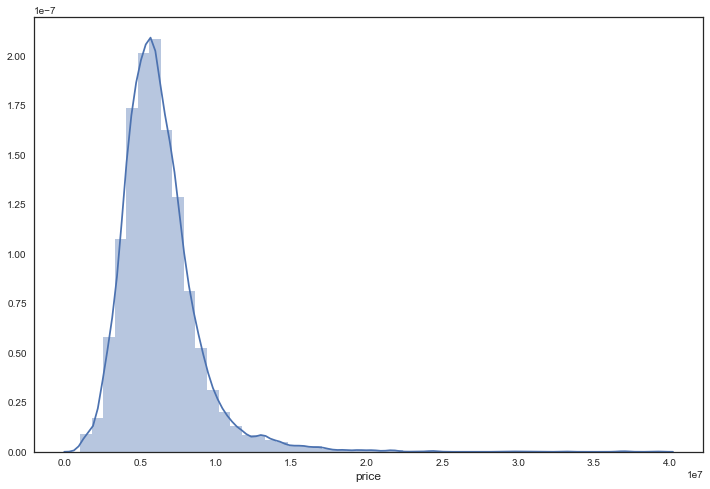

In [758]:
plt.figure(figsize=(12,8))
sns.distplot(test_pca_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(test_pca_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()